# IMPORYING BASIC LBRARIES

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# LOAD THE DATASET

In [62]:
# Load the dataset
df = pd.read_table(r"C:\Users\Pragya\Downloads\archive (2)\StudentsPerformance.csv",delimiter=",")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# EDA

**1. HEAD**

In [44]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**2. TAIL**

In [45]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


**3. SHAPE**

In [46]:
df.shape

(1000, 8)

**4. COLUMNS**

In [47]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**5. DATA TYPE**

In [48]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

**6. DESCRIPTIVE STATISTICS**

In [49]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**7. DESCRIPTIVE STATISTICS**

In [50]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


**8. SUMMARIZE INFO**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**9. DUPLICATES**

In [52]:
df.duplicated().sum()

0

**10. MISSING VALUES**

In [53]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**11. ANAMOLY DETECTION**

In [54]:
for i in df.columns:
    print({i:df[i].unique()})

{'gender': array(['female', 'male'], dtype=object)}
{'race/ethnicity': array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)}
{'parental level of education': array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)}
{'lunch': array(['standard', 'free/reduced'], dtype=object)}
{'test preparation course': array(['none', 'completed'], dtype=object)}
{'math score': array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)}
{'reading score': array([ 72,  90,  95,  57,  7

# DATA VISUALIZATION

In [ ]:
**1. Distribution of Scores (Math, Reading, Writing)**

<Axes: xlabel='writing score', ylabel='Count'>

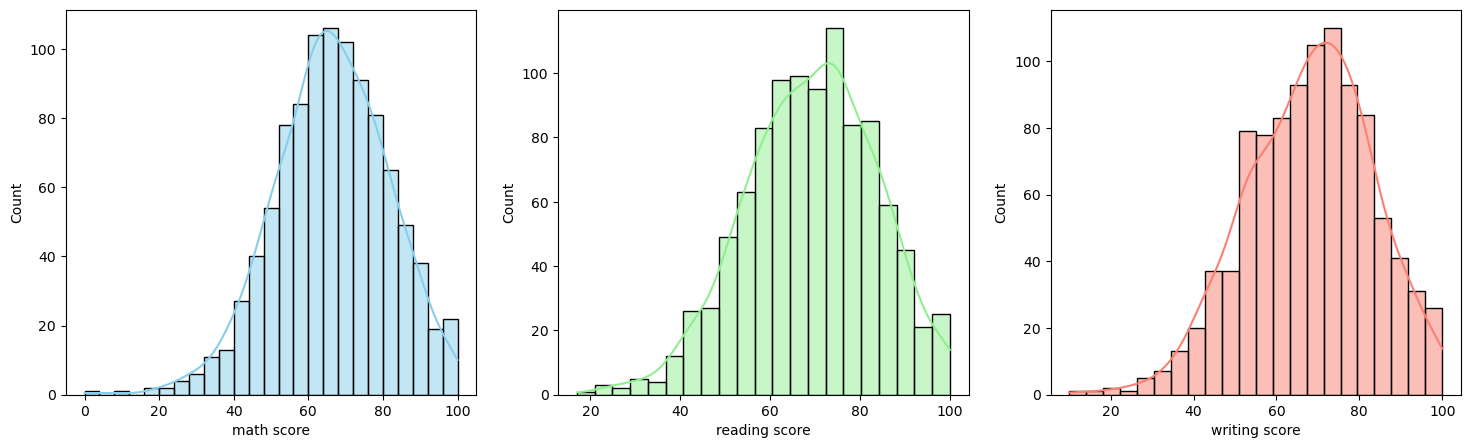

In [30]:
# Distribution of Math, Reading, and Writing Scores
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['math score'], kde=True, ax=axs[0], color='skyblue')
sns.histplot(df['reading score'], kde=True, ax=axs[1], color='lightgreen')
sns.histplot(df['writing score'], kde=True, ax=axs[2], color='salmon')

What it indicates:  

Distribution of scores for each subject.  
The shape of the distribution:  
If it's skewed right or left, it suggests that most students are scoring low or high.  
The KDE curve (Kernel Density Estimate) shows the smooth shape of the distribution.  
You can see if the dataset is normally distributed or if there's a trend (e.g., more students scoring low or high).

**2. Boxplot for Scores by Gender**

<Axes: xlabel='gender', ylabel='math score'>

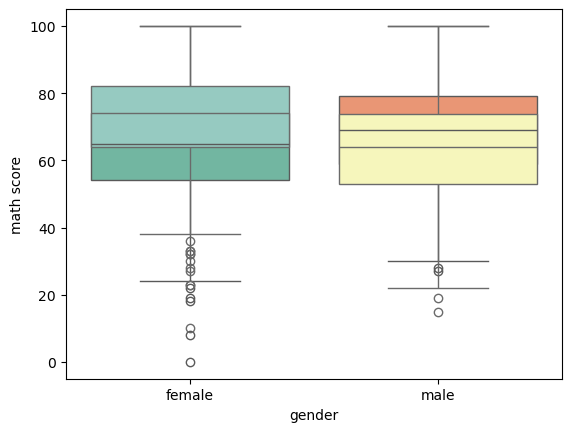

In [34]:
sns.boxplot(data=df, x='gender', y='math score', palette='Set2')
sns.boxplot(data=df, x='gender', y='writing score', palette='Set3')

Explanation:
warnings.filterwarnings('ignore') will suppress all warnings that would otherwise be printed to the console.  

This is helpful when you know certain warnings are harmless (like SettingWithCopyWarning in pandas) and don’t want them cluttering your output.

**3. Comparing Scores Based on Test Preparation Course**

<Axes: title={'center': 'Avg Scores vs Test Preparation Course'}, xlabel='test preparation course'>

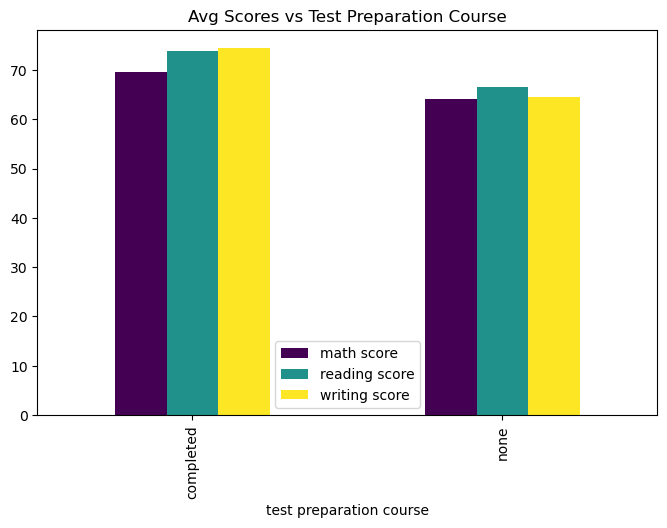

In [35]:
prep_group = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().round(2)
prep_group.plot(kind='bar', figsize=(8,5), colormap='viridis', title='Avg Scores vs Test Preparation Course')

What it indicates:  

The average score for students who completed the test preparation course versus those who did not.  

You can observe whether students who completed the prep course perform better in Math, Reading, and Writing.  

If the "completed" group has higher bars, it suggests that the test preparation course positively impacts scores.  

The bar chart makes it easy to compare average scores for each category.

**4. Boxplot for Scores by Lunch Type**

<Axes: xlabel='lunch', ylabel='math score'>

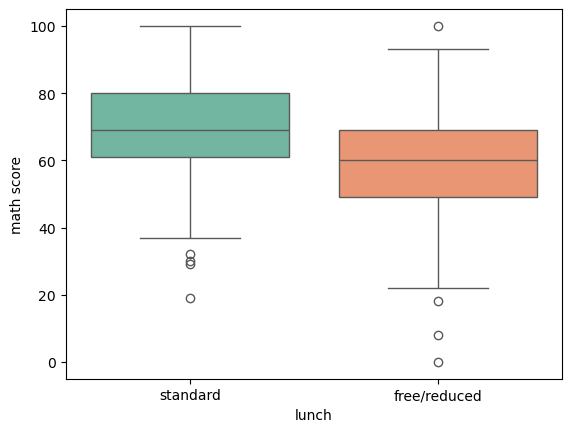

In [36]:
# Boxplot of Math Scores by Lunch Type
sns.boxplot(data=df, x='lunch', y='math score', palette='Set2')

**5. Correlation Heatmap (Math, Reading, Writing Scores)**

<Axes: >

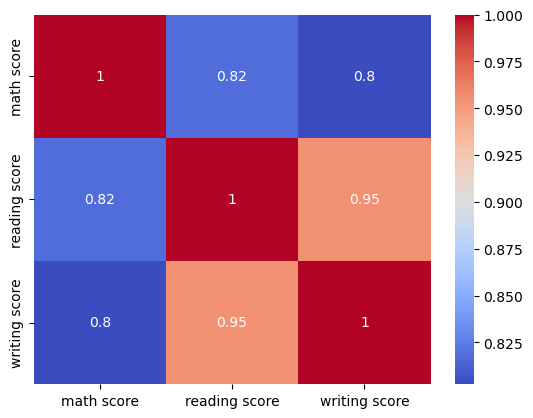

In [37]:
# Correlation heatmap of exam scores
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')

What it indicates:

The relationship between Math, Reading, and Writing scores:

The heatmap shows how correlated the subjects are.

High correlation (close to +1 or -1) between two subjects means that if a student scores high in one, they likely score high in the other.

Low correlation means the scores are more independent.

Positive correlation indicates that when one score goes up, the other one tends to go up as well.



**6. Pairplot of Scores (Math, Reading, Writing) Colored by Test Preparation Course**

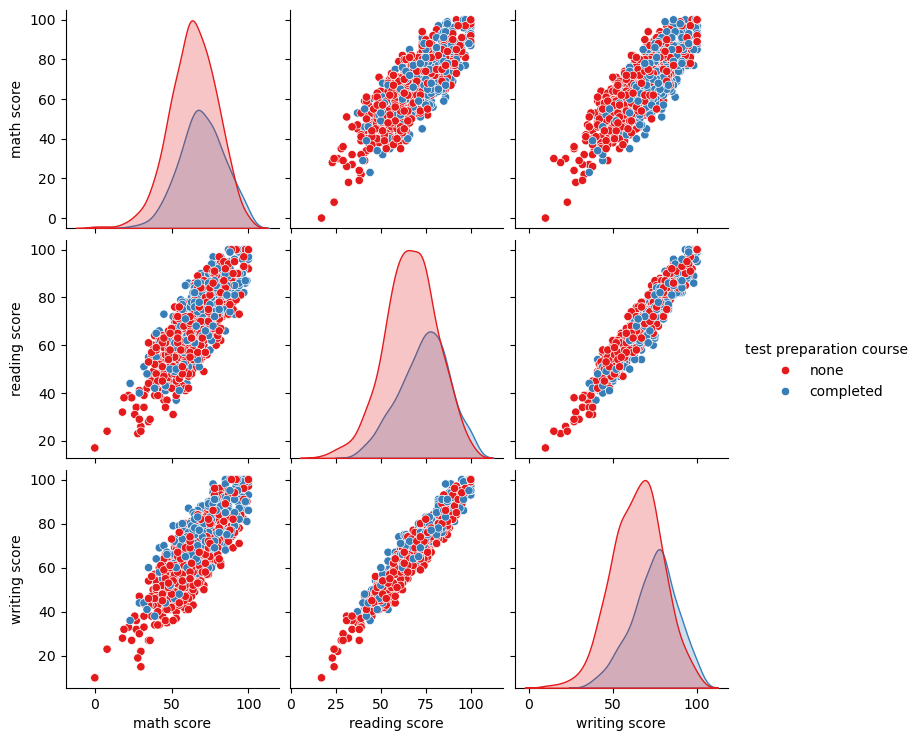

In [38]:
# Pairplot to visualize relationships between scores colored by Test Preparation Course
sns.pairplot(df, hue='test preparation course', vars=['math score', 'reading score', 'writing score'], palette='Set1')

What it indicates:

Pairwise relationships between Math, Reading, and Writing scores.

It shows how scores in one subject relate to another (e.g., do high Math scores correlate with high Reading scores?).

Clusters might appear based on the test preparation course, helping you see if the students who completed the course are grouped together in terms of scores.

Coloring by test preparation course helps differentiate between students who completed it and those who didn’t, showing whether test prep impacts the relationship between subjects.

**7. Cluster Analysis Visualization (Optional)**

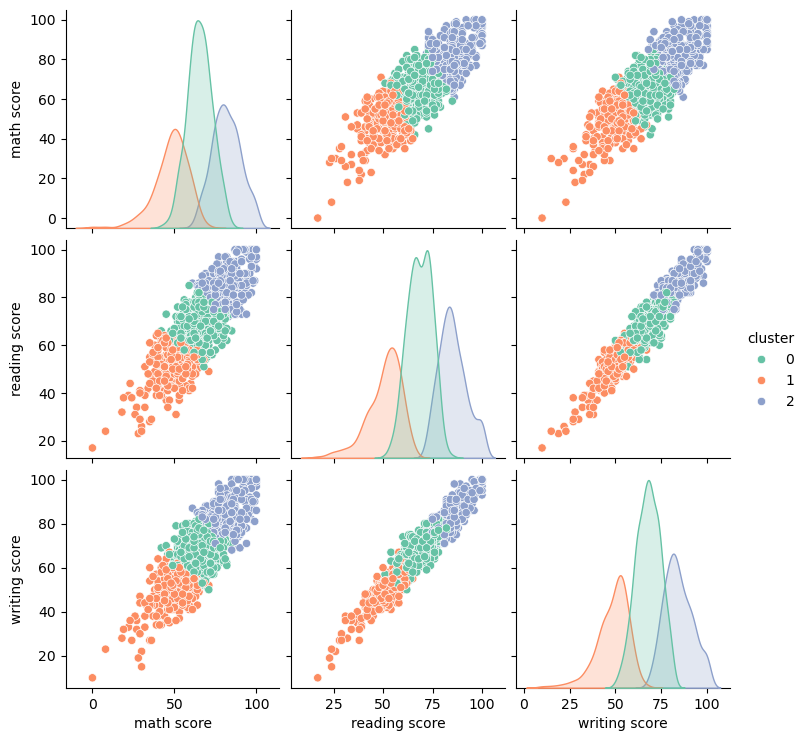

In [39]:
# Visualize clusters using pairplot (after clustering)
sns.pairplot(df, hue='cluster', vars=['math score', 'reading score', 'writing score'], palette='Set2')

What it indicates:

If you’ve applied K-Means clustering (or any other clustering method), this visualization shows how students have been grouped based on their performance across all three subjects.

The color-coded clusters help you understand if students with similar scores are grouped together, and you can explore:

Which subjects contribute most to these clusters.

The distribution of students within each cluster.

Whether students in the same cluster tend to have similar levels of performance across subjects.

**Summary of What You Can Learn from Visualizations:**

Distributions: Understand the overall spread and distribution of scores for each subject.

Boxplots: Compare the performance of different groups (e.g., by gender or lunch type) to see if there are significant differences.

Bar Charts: Identify the effect of test preparation on student scores.

Heatmap: Measure the correlation between different exam scores (Math, Reading, Writing).

Pairplot: Visualize the relationship between the subjects and explore clustering patterns.

Cluster Analysis: See how students are grouped based on their scores.

# CONCLUSION


**Overall Performance Trends:**

Most students tend to score similarly across math, reading, and writing — these subjects are strongly correlated.

A few students scored exceptionally high or low, indicating natural variability in academic performance.

**Effect of Parental Education:**

Students whose parents have higher education levels (Bachelor’s or Master’s degrees) generally perform better across all subjects.

Grouping education levels into broader categories (Low, Mid, High) reveals a positive relationship between parental education and student scores.

**Impact of Test Preparation Course:**

Students who completed a test preparation course consistently achieved higher average scores in all three subjects.

This suggests that the test prep program had a positive impact on student performance.

**Lunch Type (Socioeconomic Indicator):**

Students with standard lunch performed significantly better than those with free/reduced lunch, indicating a potential link between socioeconomic status and academic achievement.

**Gender-based Differences:**

Female students tend to perform better in reading and writing, while male students have slightly better or similar performance in math.

These trends are consistent with broader educational research.

**Clustering Insights:**

Students were successfully grouped into 3 clusters based on their scores.

One cluster represents high performers across all subjects.

One represents average performers, and

One includes students needing support, with lower scores.

These clusters can help target academic interventions or identify learning patterns.

**Outliers:**

Outliers were identified using boxplots — many are valid (e.g., high scores due to effort), so they were retained.

These outliers represent students with exceptional performance or those who may require additional academic support.


# DATA PREPROCESSING

**GROUPING THE VALUES**

In [63]:
# Use replace function to group education levels
df['parental level of education'] = df['parental level of education'].replace({
    "some high school": "Low Education",
    "high school": "Low Education",
    "some college": "Mid-Level Education",
    "associate's degree": "Mid-Level Education",
    "bachelor's degree": "Higher Education",
    "master's degree": "Higher Education"
})


In [64]:
df['parental level of education'].value_counts()

parental level of education
Mid-Level Education    448
Low Education          375
Higher Education       177
Name: count, dtype: int64

In [65]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,Higher Education,standard,none,72,72,74
1,female,group C,Mid-Level Education,standard,completed,69,90,88
2,female,group B,Higher Education,standard,none,90,95,93
3,male,group A,Mid-Level Education,free/reduced,none,47,57,44
4,male,group C,Mid-Level Education,standard,none,76,78,75


**SELECT NUMERICAL FEATURES FOR CLUSTERING**

In [66]:
features = ['math score', 'reading score', 'writing score']
X = df[features]
X

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


**STANDARDIZE THE SCORES**

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**FIND THE OPTIMAL NUMBER OF CLUTERS USING ELBOW METHOD**

In [68]:
sse = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)


**PLOT ELBOW CURVE**

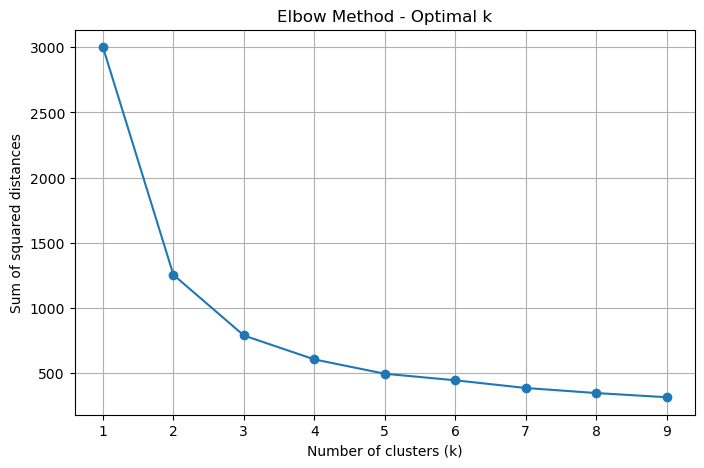

In [69]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()


**LETS CHOOSE K=3 FOR EXAMPLE BECOZ I WAT TO MAKE GROUP 3 KIND OF STUDENT**

In [70]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


**VISUALIZE CLUSTERS USING PAIRPLOT**

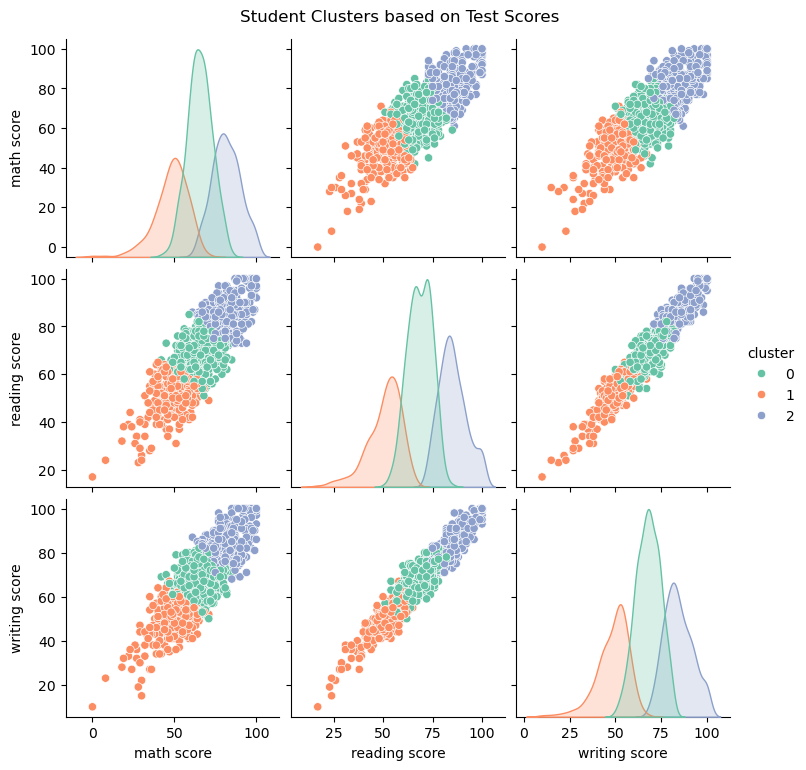

In [71]:
sns.pairplot(df, hue='cluster', vars=features, palette='Set2')
plt.suptitle('Student Clusters based on Test Scores', y=1.02)
plt.show()

**SILHOUTTE SCORE**

In [72]:
score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score for k={k}: {score:.2f}")

Silhouette Score for k=3: 0.41


**VIEW FIRST FEW ROWS WITH CLUSTER LABEL**

In [73]:
print(df[['math score', 'reading score', 'writing score', 'cluster']].head())

   math score  reading score  writing score  cluster
0          72             72             74        0
1          69             90             88        2
2          90             95             93        2
3          47             57             44        1
4          76             78             75        2


**VIEW POINTS IN EACH CLUSTER**

In [74]:
for i in range(df['cluster'].nunique()):
    print(f"\nCluster {i} Students:")
    display(df[df['cluster'] == i][['math score', 'reading score', 'writing score']])



Cluster 0 Students:


,math score,reading score,writing score
0,72,72,74
8,64,64,67
12,65,81,73
13,78,72,70
15,69,75,78
...,...,...,...
992,55,76,76
993,62,72,74
994,63,63,62
997,59,71,65



Cluster 1 Students:


,math score,reading score,writing score
3,47,57,44
7,40,43,39
9,38,60,50
10,58,54,52
11,40,52,43
...,...,...,...
980,8,24,23
985,57,51,54
986,40,59,51
988,44,45,45



Cluster 2 Students:


,math score,reading score,writing score
1,69,90,88
2,90,95,93
4,76,78,75
5,71,83,78
6,88,95,92
...,...,...,...
987,81,75,76
989,67,86,83
990,86,81,75
995,88,99,95


**SAVE TO CSV**

In [ ]:
df.to_csv('students_with_clusters.csv', index=False)

**VISUALIZE CLUSTER ASSIGNMENTS(2D EXAMPLE)**

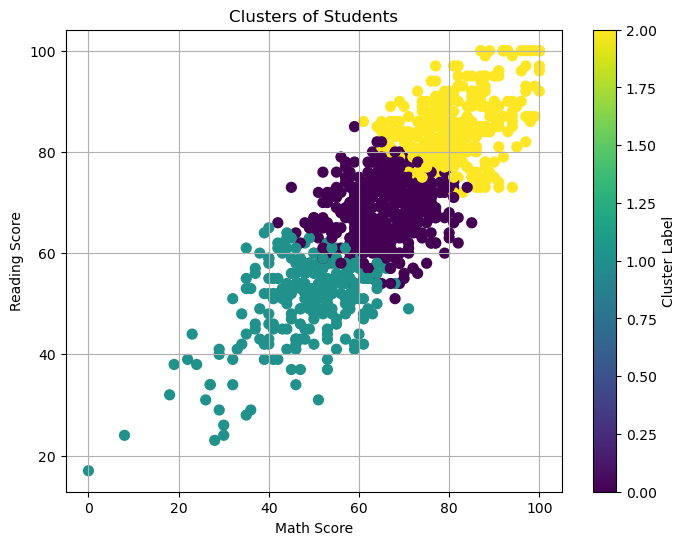

In [75]:
import matplotlib.pyplot as plt

# Scatter plot of clusters (using 2 subjects for visualization)
plt.figure(figsize=(8,6))
plt.scatter(df['math score'], df['reading score'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Clusters of Students')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()